<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/01.E0-Excercicio-Limpeza-de-dados">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Preparação da base de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Limpeza de dados

Nesta lista de exercícios, você será deverá aplicar técnicas de processamento de dados e limpeza de dados para lidar com problemas comuns encontrados em conjuntos de dados do mundo real. Aplique as técnicas aprendidas na disciplina de Mineração de Dados para tratar dados faltantes e inconsistências, tornando os dados prontos para análises subsequentes.

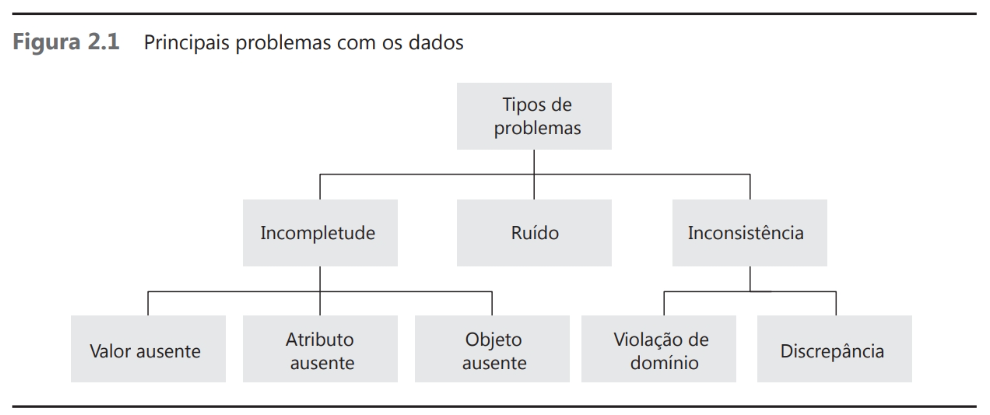

Para este exercícios será utilizada a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) que contém informações sobre hábitos alimentares de um conjunto de estudantes. 


Este conjunto de dados possui valores ausentes em várias colunas. Sua tarefa é:

1. Identificar todas as colunas com dados faltantes.
1. Escolher a estratégia apropriada para tratar cada tipo de dado faltante (exemplo: preenchimento com média, mediana, valor mais frequente, ou remoção de linhas com dados faltantes).
1. Identificar as inconsistências específicas no conjunto de dados, como valores fora do intervalo.
1. Desenvolver um plano de ação para lidar com cada tipo de inconsistência (por exemplo, remoção de registros, correção de valores, ou imputação).
1. Aplicar as estratégias e o plano de ação escolhidos para preencher ou remover os dados faltantes e limpar os dados inconsistentes.
1. Documentar as ações tomadas em cada etapa do processo e justificar suas decisões.

**Todos os problemas** no conjunto precisam ser detectados e as ações tomadas devidamente justificadas e documentadas neste `.ipynb`. As justificativas devem ser descritas em células do tipo *Markdown* e as operações/ajustes deve estar implementadas na célula de código imediatamente subsequênte. O texto deve ser linear e conciso. 

## Solução

### Carga do conjunto de dados `food_coded.csv`

In [363]:
import numpy as np 
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")
df

GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0      2.4       2          1               430           NaN           315.0   
1    3.654       1          1               610           3.0           420.0   
2      3.3       1          1               720           4.0           420.0   
3      3.2       1          1               430           3.0           420.0   
4      3.5       1          1               720           2.0           420.0   
..     ...     ...        ...               ...           ...             ...   
120    3.5       1          1               610           4.0           420.0   
121      3       1          1               265           2.0           315.0   
122  3.882       1          1               720           NaN           420.0   
123      3       2          1               720           4.0           420.0   
124    3.9       1          1               430           NaN           315.0   

     coffee                             comfort_food  \
0         1                                     none   
1         2              chocolate, chips, ice cream   
2         2          frozen yogurt, pizza, fast food   
3         2         Pizza, Mac and cheese, ice cream   
4         2             Ice cream, chocolate, chips    
..      ...                                      ...   
120       2  wine. mac and cheese, pizza, ice cream    
121       2               Pizza / Wings / Cheesecake   
122       1               rice, potato, seaweed soup   
123       1             Mac n Cheese, Lasagna, Pizza   
124       2             Chocolates, pizza, and Ritz.   

                              comfort_food_reasons  \
0                            we dont have comfort    
1                             Stress, bored, anger   
2                                  stress, sadness   
3                                          Boredom   
4                       Stress, boredom, cravings    
..                                             ...   
120                           boredom and sadness    
121                Loneliness / Homesick / Sadness   
122                                        sadness   
123  happiness, they are some of my favorite foods   
124               hormones, Premenstrual syndrome.   

     comfort_food_reasons_coded  ...  soup  sports  thai_food  \
0                           9.0  ...   1.0     1.0          1   
1                           1.0  ...   1.0     1.0          2   
2                           1.0  ...   1.0     2.0          5   
3                           2.0  ...   1.0     2.0          5   
4                           1.0  ...   1.0     1.0          4   
..                          ...  ...   ...     ...        ...   
120                         NaN  ...   1.0     1.0          5   
121                         NaN  ...   1.0     NaN          4   
122                         NaN  ...   1.0     2.0          5   
123                         NaN  ...   2.0     2.0          1   
124                         NaN  ...   1.0     2.0          2   

    tortilla_calories  turkey_calories  type_sports veggies_day  vitamins  \
0              1165.0              345   car racing           5         1   
1               725.0              690  Basketball            4         2   
2              1165.0              500         none           5         1   
3               725.0              690          NaN           3         1   
4               940.0              500     Softball           4         2   
..                ...              ...          ...         ...       ...   
120             940.0              500     Softball           5         1   
121             940.0              500  basketball            5         2   
122             580.0              690         none           4         2   
123             940.0              500          NaN           3         1   
124             725.0              345          NaN           4         2   

     w


### (Exemplo) Ajuste do atributo `soup`:

A coluna `soup` tem um dado faltante na linha 63. O valor será preenchido com o valor mais escolhido na amostra (moda). 

In [364]:
display(df.loc[[63],'soup':])
df['soup'].fillna(df['soup'].mode()[0], inplace=True)
display(df.loc[[63],'soup':])


soup  sports  thai_food  tortilla_calories  turkey_calories type_sports  \
63   NaN     1.0          4             1165.0              690     rowing    

    veggies_day  vitamins  waffle_calories weight  
63            5         2             1315    180

soup  sports  thai_food  tortilla_calories  turkey_calories type_sports  \
63   1.0     1.0          4             1165.0              690     rowing    

    veggies_day  vitamins  waffle_calories weight  
63            5         2             1315    180


### Ajuste do atributo `GPA`:

A coluna `GPA` tem dados faltantes. O valor será preenchido com a média. 

In [365]:
def to_float(x):
    try: return float(x)
    except: return np.NaN

mask = df['GPA'].isnull()
# df[mask]

df.loc[73, 'GPA'] = df.loc[73, 'GPA'].split()[0]

df['GPA'] = df['GPA'].apply(to_float)

df['GPA'].fillna(df['GPA'].mean(), inplace=True)
df['GPA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: GPA
Non-Null Count  Dtype  
--------------  -----  
125 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB



### Ajuste do atributo `calories_day`:

A coluna `calories_day` tem dados faltantes. O valor será preenchido com o valor mais escolhido na amostra (moda). 

In [366]:
df['calories_day'].info()

mask = df['calories_day'].isnull()

df[mask]

df['calories_day'].value_counts()

df['calories_day'].fillna(df['calories_day'].mode()[0], inplace=True)
df['calories_day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: calories_day
Non-Null Count  Dtype  
--------------  -----  
106 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: calories_day
Non-Null Count  Dtype  
--------------  -----  
125 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB



### Ajuste do atributo `comfort_food_reasons_coded`:

A coluna `comfort_food_reasons_coded` tem dados faltantes nas últimas 19 linhas. O valor será preenchido com base nos valores de `comfort_food_reasons`. 

In [367]:
df['comfort_food_reasons_coded'].info()

mask = df['comfort_food_reasons_coded'].isnull()
df[mask]['comfort_food_reasons_coded']

display(df[['comfort_food_reasons']][106:])

reasons_coded = {'stress': 1.0, 'boredom': 2.0, 'depression': 3.0, 'sadness': 3.0,
                 'hunger': 4.0, 'laziness': 5.0, 'cold weather': 6.0, 'happiness': 7.0,
                 'watching tv': 8.0, 'none': 9.0}

reasons = df[['comfort_food_reasons']][106:]

firstAppearence = df['comfort_food_reasons'][106:].str.replace(",", "").str.lower().str.split().str[0]
df.loc[[107], 'comfort_food_reasons':]
firstAppearence.loc[107] = 1.0

df.loc[[117], 'comfort_food_reasons':]
firstAppearence.loc[117] = 7.0

df.loc[[124], 'comfort_food_reasons':]
firstAppearence.loc[124] = 3.0

df.loc[[116], 'comfort_food_reasons':]
firstAppearence.loc[116] = 3.0

df.loc[[121], 'comfort_food_reasons':]
firstAppearence.loc[121] = 3.0
firstAppearence = firstAppearence.replace(reasons_coded)
df.loc[106:, 'comfort_food_reasons_coded'] = firstAppearence
display(df[['comfort_food_reasons_coded']][106:])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: comfort_food_reasons_coded
Non-Null Count  Dtype  
--------------  -----  
106 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


comfort_food_reasons
106                                 Stress and sadness
107  I am always stressed out, and bored when I am ...
108                           Stress, sadness, boredom
109           Stress, frustration, self-consciousness 
110                               Sadness and cravings
111                                            boredom
112                     Sadness, happiness and boredom
113                                Boredom and sadness
114                      sadness, happiness and hunger
115              Stress, boredom and physical activity
116                     loneliness, homework, boredom 
117  When i'm  eating with my close friends/ Food s...
118                                Stress and boredom 
119                   Happiness, boredom, social event
120                               boredom and sadness 
121                    Loneliness / Homesick / Sadness
122                                            sadness
123      happiness, they are some of my favorite foods
124                   hormones, Premenstrual syndrome.

comfort_food_reasons_coded
106                         1.0
107                         1.0
108                         1.0
109                         1.0
110                         3.0
111                         2.0
112                         3.0
113                         2.0
114                         3.0
115                         1.0
116                         3.0
117                         7.0
118                         1.0
119                         7.0
120                         2.0
121                         3.0
122                         3.0
123                         7.0
124                         3.0


### Ajuste do atributo `type_sports`:

A coluna `type_sports` tem dados faltantes e ruídos com capitalização das respostas. O valor será preenchido "none" e as respostas capitalizadas para minúsculo.

In [368]:
df['type_sports'].info()

mask = df['type_sports'].isnull()
df[mask]

cols = df.isnull().sum().sort_values(ascending=False).index
df[cols]

df[cols][mask]

df[cols][(df['type_sports'] == 'Soccer') | (df['type_sports'] == 'soccer')]
df['type_sports'] = df['type_sports'].str.lower()
df[cols][df['type_sports'] == 'soccer']

df[['type_sports']].value_counts()

df['type_sports'].fillna('none', inplace=True)
df['type_sports'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: type_sports
Non-Null Count  Dtype 
--------------  ----- 
99 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: type_sports
Non-Null Count  Dtype 
--------------  ----- 
125 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB



### Ajuste do atributo `calories_scone`:

A coluna `calories_scone` tem um dado faltante na linha 100. O valor será preenchido com a moda.

In [369]:
df['calories_scone'].info()
mask = df['calories_scone'].isnull()
display(df.loc[[100], 'calories_scone':])

df['calories_scone'].fillna(df['calories_scone'].mode()[0], inplace=True)

display(df.loc[[100], 'calories_scone':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: calories_scone
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


calories_scone  coffee                   comfort_food  \
100             NaN       2  watermelon, grapes, ice cream   

    comfort_food_reasons  comfort_food_reasons_coded  cook  \
100  Sad, bored, excited                         3.0   3.0   

     comfort_food_reasons_coded.1  cuisine  \
100                             3      1.0   

                                          diet_current  diet_current_coded  \
100  I typically eat very healthy. i consume fruits...                   1   

     ...  soup sports  thai_food  tortilla_calories  turkey_calories  \
100  ...   1.0    1.0          5                NaN              500   

           type_sports  veggies_day  vitamins  waffle_calories weight  
100  volleyball, track            5         2              900    125  

[1 rows x 56 columns]

calories_scone  coffee                   comfort_food  \
100           420.0       2  watermelon, grapes, ice cream   

    comfort_food_reasons  comfort_food_reasons_coded  cook  \
100  Sad, bored, excited                         3.0   3.0   

     comfort_food_reasons_coded.1  cuisine  \
100                             3      1.0   

                                          diet_current  diet_current_coded  \
100  I typically eat very healthy. i consume fruits...                   1   

     ...  soup sports  thai_food  tortilla_calories  turkey_calories  \
100  ...   1.0    1.0          5                NaN              500   

           type_sports  veggies_day  vitamins  waffle_calories weight  
100  volleyball, track            5         2              900    125  

[1 rows x 56 columns]


### Ajuste do atributo `comfort_food`:

A coluna `comfort_food` tem um dado faltante na linha 74. O valor será preenchido com "unknown".

In [370]:
df['comfort_food'].info()

mask = df['comfort_food'].isnull()
display(df.loc[[74], 'comfort_food':])
df['comfort_food'].value_counts()
df['comfort_food'].fillna("unknown", inplace=True)

display(df.loc[[74], 'comfort_food':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: comfort_food
Non-Null Count  Dtype 
--------------  ----- 
124 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


comfort_food comfort_food_reasons  comfort_food_reasons_coded  cook  \
74          NaN                  NaN                         9.0   2.0   

    comfort_food_reasons_coded.1  cuisine diet_current  diet_current_coded  \
74                             9      4.0          NaN                   4   

    drink eating_changes  ...  soup  sports  thai_food  tortilla_calories  \
74    2.0            NaN  ...   1.0     2.0          3              580.0   

    turkey_calories  type_sports  veggies_day vitamins waffle_calories  weight  
74              345         none            4        2             760     NaN  

[1 rows x 54 columns]

comfort_food comfort_food_reasons  comfort_food_reasons_coded  cook  \
74      unknown                  NaN                         9.0   2.0   

    comfort_food_reasons_coded.1  cuisine diet_current  diet_current_coded  \
74                             9      4.0          NaN                   4   

    drink eating_changes  ...  soup  sports  thai_food  tortilla_calories  \
74    2.0            NaN  ...   1.0     2.0          3              580.0   

    turkey_calories  type_sports  veggies_day vitamins waffle_calories  weight  
74              345         none            4        2             760     NaN  

[1 rows x 54 columns]

### Ajuste do atributo `comfort_food_reasons`:

A coluna `comfort_food_reasons` tem dados faltantes nas linhas 74 e 88. O valor será preenchido com a moda.

In [371]:
df['comfort_food_reasons'].info()

mask = df['comfort_food_reasons'].isnull()
display(df.loc[[74, 88], 'comfort_food_reasons':])
df['comfort_food_reasons'].value_counts()
df['comfort_food_reasons'].fillna(df['comfort_food_reasons'].mode()[0], inplace=True)

display(df.loc[[74, 88], 'comfort_food_reasons':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: comfort_food_reasons
Non-Null Count  Dtype 
--------------  ----- 
123 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


comfort_food_reasons  comfort_food_reasons_coded  cook  \
74                  NaN                         9.0   2.0   
88                  NaN                         9.0   NaN   

    comfort_food_reasons_coded.1  cuisine  \
74                             9      4.0   
88                             9      1.0   

                                         diet_current  diet_current_coded  \
74                                                NaN                   4   
88  High protein and high carbs with fruits and ve...                   2   

    drink                eating_changes  eating_changes_coded  ...  soup  \
74    2.0                           NaN                     3  ...   1.0   
88    2.0  Willingly eating vegetables                      2  ...   1.0   

    sports  thai_food  tortilla_calories  turkey_calories  type_sports  \
74     2.0          3              580.0              345         none   
88     2.0          5             1165.0              850         none   

   veggies_day vitamins  waffle_calories  weight  
74           4        2              760     NaN  
88           4        1             1315     175  

[2 rows x 53 columns]

comfort_food_reasons  comfort_food_reasons_coded  cook  \
74              boredom                         9.0   2.0   
88              boredom                         9.0   NaN   

    comfort_food_reasons_coded.1  cuisine  \
74                             9      4.0   
88                             9      1.0   

                                         diet_current  diet_current_coded  \
74                                                NaN                   4   
88  High protein and high carbs with fruits and ve...                   2   

    drink                eating_changes  eating_changes_coded  ...  soup  \
74    2.0                           NaN                     3  ...   1.0   
88    2.0  Willingly eating vegetables                      2  ...   1.0   

    sports  thai_food  tortilla_calories  turkey_calories  type_sports  \
74     2.0          3              580.0              345         none   
88     2.0          5             1165.0              850         none   

   veggies_day vitamins  waffle_calories  weight  
74           4        2              760     NaN  
88           4        1             1315     175  

[2 rows x 53 columns]

### Ajuste do atributo `cook`:

A coluna `cook` tem dados faltantes nas linhas 82, 88 e 124. O valor será preenchido com a moda.

In [372]:
df['cook'].info()

mask = df['cook'].isnull()
df[mask]

display(df.loc[[82, 88, 124], 'cook':])

df['cook'].fillna(df['cook'].mode()[0], inplace=True)

display(df.loc[[82, 88, 124], 'cook':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: cook
Non-Null Count  Dtype  
--------------  -----  
122 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


cook  comfort_food_reasons_coded.1  cuisine  \
82    NaN                             2      1.0   
88    NaN                             9      1.0   
124   NaN                             5      3.0   

                                          diet_current  diet_current_coded  \
82   I eat two-tree meals per day. Always eat a bre...                   4   
88   High protein and high carbs with fruits and ve...                   2   
124          high in protein and low in carbohydrates.                   1   

     drink                           eating_changes  eating_changes_coded  \
82     2.0                 Food is not as healthy.                      1   
88     2.0             Willingly eating vegetables                      2   
124    1.0  I have learned to eat more vegetables.                      2   

     eating_changes_coded1  eating_out  ...  soup  sports  thai_food  \
82                       3           5  ...   1.0     1.0          3   
88                       5           1  ...   1.0     2.0          5   
124                      5           1  ...   1.0     2.0          2   

     tortilla_calories turkey_calories type_sports  veggies_day  vitamins  \
82               580.0             345   wrestling            3         2   
88              1165.0             850        none            4         1   
124              725.0             345        none            4         2   

    waffle_calories  weight  
82              575     170  
88             1315     175  
124             575     135  

[3 rows x 51 columns]

cook  comfort_food_reasons_coded.1  cuisine  \
82    3.0                             2      1.0   
88    3.0                             9      1.0   
124   3.0                             5      3.0   

                                          diet_current  diet_current_coded  \
82   I eat two-tree meals per day. Always eat a bre...                   4   
88   High protein and high carbs with fruits and ve...                   2   
124          high in protein and low in carbohydrates.                   1   

     drink                           eating_changes  eating_changes_coded  \
82     2.0                 Food is not as healthy.                      1   
88     2.0             Willingly eating vegetables                      2   
124    1.0  I have learned to eat more vegetables.                      2   

     eating_changes_coded1  eating_out  ...  soup  sports  thai_food  \
82                       3           5  ...   1.0     1.0          3   
88                       5           1  ...   1.0     2.0          5   
124                      5           1  ...   1.0     2.0          2   

     tortilla_calories turkey_calories type_sports  veggies_day  vitamins  \
82               580.0             345   wrestling            3         2   
88              1165.0             850        none            4         1   
124              725.0             345        none            4         2   

    waffle_calories  weight  
82              575     170  
88             1315     175  
124             575     135  

[3 rows x 51 columns]

### Ajuste do atributo `cuisine`:

A coluna `cuisine` tem 17 dados faltantes. O valor será preenchido com a moda.

In [373]:
df['cuisine'].info()
mask = df['cuisine'].isnull()
display(df[mask]['cuisine'])

### Verificar os tipos selecionados
df['cuisine'].value_counts()

df['cuisine'].fillna(df['cuisine'].mode()[0], inplace=True)

display(df['cuisine'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: cuisine
Non-Null Count  Dtype  
--------------  -----  
108 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


0     NaN
5     NaN
16    NaN
29    NaN
32    NaN
36    NaN
55    NaN
61    NaN
69    NaN
89    NaN
90    NaN
94    NaN
106   NaN
111   NaN
116   NaN
121   NaN
122   NaN
Name: cuisine, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: cuisine
Non-Null Count  Dtype  
--------------  -----  
125 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


None

### Ajuste do atributo `diet_current`:

A coluna `diet_current` tem um dado faltante. O valor será preenchido com base no valor de `diet_current_coded`.

In [374]:
df['diet_current'].info()
mask = df['diet_current'].isnull()
df[mask]['diet_current']

df['diet_current'].value_counts()

df.loc[[74], 'diet_current_coded']

display(df.loc[[74], 'diet_current':])
df.loc[[74], 'diet_current'] = 'unclear'
display(df.loc[[74], 'diet_current':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: diet_current
Non-Null Count  Dtype 
--------------  ----- 
124 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


diet_current  diet_current_coded  drink eating_changes  \
74          NaN                   4    2.0            NaN   

    eating_changes_coded  eating_changes_coded1  eating_out  employment  \
74                     3                      4           1         3.0   

    ethnic_food  exercise  ...  soup sports thai_food  tortilla_calories  \
74            3       2.0  ...   1.0    2.0         3              580.0   

    turkey_calories type_sports  veggies_day  vitamins  waffle_calories  \
74              345        none            4         2              760   

    weight  
74     NaN  

[1 rows x 48 columns]

diet_current  diet_current_coded  drink eating_changes  \
74      unclear                   4    2.0            NaN   

    eating_changes_coded  eating_changes_coded1  eating_out  employment  \
74                     3                      4           1         3.0   

    ethnic_food  exercise  ...  soup sports thai_food  tortilla_calories  \
74            3       2.0  ...   1.0    2.0         3              580.0   

    turkey_calories type_sports  veggies_day  vitamins  waffle_calories  \
74              345        none            4         2              760   

    weight  
74     NaN  

[1 rows x 48 columns]

### Ajuste do atributo `drink`:

A coluna `drink` tem dados faltantes nas linhas 21 e 63. O valor será preenchido com a moda.

In [375]:
df['drink'].info()

mask = df['drink'].isnull()
df[mask]

display(df.loc[[21, 63], 'drink':])

df['drink'].fillna(df['drink'].mode()[0], inplace=True)

display(df.loc[[21, 63], 'drink':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: drink
Non-Null Count  Dtype  
--------------  -----  
123 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


drink            eating_changes  eating_changes_coded  \
21    NaN  Less money, less food :(                     1   
63    NaN                       NaN                     3   

    eating_changes_coded1  eating_out  employment  ethnic_food  exercise  \
21                      8           1         2.0            3       1.0   
63                      4           4         3.0            5       1.0   

    father_education             father_profession  ... soup  sports  \
21               4.0  European logistics director   ...  2.0     1.0   
63               4.0                     VP of GNC  ...  1.0     1.0   

    thai_food tortilla_calories  turkey_calories  type_sports  veggies_day  \
21          5             725.0              500       tennis            2   
63          4            1165.0              690      rowing             5   

    vitamins  waffle_calories weight  
21         2              900    195  
63         2             1315    180  

[2 rows x 46 columns]

drink            eating_changes  eating_changes_coded  \
21    2.0  Less money, less food :(                     1   
63    2.0                       NaN                     3   

    eating_changes_coded1  eating_out  employment  ethnic_food  exercise  \
21                      8           1         2.0            3       1.0   
63                      4           4         3.0            5       1.0   

    father_education             father_profession  ... soup  sports  \
21               4.0  European logistics director   ...  2.0     1.0   
63               4.0                     VP of GNC  ...  1.0     1.0   

    thai_food tortilla_calories  turkey_calories  type_sports  veggies_day  \
21          5             725.0              500       tennis            2   
63          4            1165.0              690      rowing             5   

    vitamins  waffle_calories weight  
21         2              900    195  
63         2             1315    180  

[2 rows x 46 columns]

### Ajuste do atributo `eating_changes`:

A coluna `eating_changes` tem dados faltantes nas linhas 53, 63 e 74. O valor será preenchido com a moda.

In [376]:
df['eating_changes'].info()
    
mask = df['eating_changes'].isnull()
df[mask]

display(df.loc[[53, 63, 74], 'eating_changes':])

df['eating_changes'].fillna(df['eating_changes'].mode()[0], inplace=True)

display(df.loc[[53, 63, 74], 'eating_changes':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: eating_changes
Non-Null Count  Dtype 
--------------  ----- 
122 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


eating_changes  eating_changes_coded  eating_changes_coded1  eating_out  \
53            NaN                     3                      4           3   
63            NaN                     3                      4           4   
74            NaN                     3                      4           1   

    employment  ethnic_food  exercise  father_education  father_profession  \
53         NaN            3       NaN               2.0  HVAC Professional   
63         3.0            5       1.0               4.0          VP of GNC   
74         3.0            3       2.0               1.0             retire   

        fav_cuisine  ...  soup  sports thai_food  tortilla_calories  \
53  Sub sandwhiches  ...   1.0     2.0         1              940.0   
63         Italian   ...   1.0     1.0         4             1165.0   
74              NaN  ...   1.0     2.0         3              580.0   

    turkey_calories  type_sports  veggies_day  vitamins waffle_calories weight  
53              500         none            4         1            1315    265  
63              690      rowing             5         2            1315    180  
74              345         none            4         2             760    NaN  

[3 rows x 45 columns]

eating_changes  eating_changes_coded  eating_changes_coded1  eating_out  \
53           none                     3                      4           3   
63           none                     3                      4           4   
74           none                     3                      4           1   

    employment  ethnic_food  exercise  father_education  father_profession  \
53         NaN            3       NaN               2.0  HVAC Professional   
63         3.0            5       1.0               4.0          VP of GNC   
74         3.0            3       2.0               1.0             retire   

        fav_cuisine  ...  soup  sports thai_food  tortilla_calories  \
53  Sub sandwhiches  ...   1.0     2.0         1              940.0   
63         Italian   ...   1.0     1.0         4             1165.0   
74              NaN  ...   1.0     2.0         3              580.0   

    turkey_calories  type_sports  veggies_day  vitamins waffle_calories weight  
53              500         none            4         1            1315    265  
63              690      rowing             5         2            1315    180  
74              345         none            4         2             760    NaN  

[3 rows x 45 columns]

### Ajuste do atributo `employment`:

A coluna `employment` tem 9 dados faltantes. O valor será preenchido com a distribuição proporcional.

In [377]:
mask = df['employment'].isnull()
display(df[mask]['employment'])

display(df['employment'].value_counts())

### Distribuição
total_nan = df['employment'].isnull().sum()
employment2 = round(total_nan*(60/(60+54+2)))
employment3 = round(total_nan*(54/(60+54+2)))
employment3
### Preenchendo proporcionalmente
df.loc[df['employment'].isnull(), 'employment'] = np.concatenate([
    np.full(employment2, 2.0),
    np.full(employment3, 3.0)
])

df['employment'].info()

43    NaN
47    NaN
49    NaN
52    NaN
53    NaN
83    NaN
94    NaN
105   NaN
106   NaN
Name: employment, dtype: float64

employment
2.0    60
3.0    54
1.0     2
Name: count, dtype: int64

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: employment
Non-Null Count  Dtype  
--------------  -----  
125 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


### Ajuste do atributo `exercise`:

A coluna `exercise` tem dados faltantes. O valor será preenchido com a distribuição proporcional.

In [378]:
df['exercise'].info()
mask = df['exercise'].isnull()
df[mask]['exercise']

df['exercise'].value_counts()
total_nulos = df['exercise'].isnull().sum()
### Distribuição
exercise1 = int(total_nulos*(57/(57+44+11)))
exercise2 = int(total_nulos*(44/(57+44+11)))
exercise3 = total_nulos - exercise1 - exercise2
df['exercise'].value_counts()

### Preenchendo proporcionalmente
df.loc[df['exercise'].isnull(), 'exercise'] = np.concatenate([
    np.full(exercise1, 1.0),
    np.full(exercise2, 2.0),
    np.full(exercise3, 3.0)
])

df['exercise'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: exercise
Non-Null Count  Dtype  
--------------  -----  
112 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: exercise
Non-Null Count  Dtype  
--------------  -----  
125 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


### Ajuste do atributo `father_education`:

A coluna `father_education` tem um dado faltante. O valor será preenchido com a moda.

In [379]:
df['father_education'].info()
mask = df['father_education'].isnull()
df[mask]['father_education']

df['father_education'].value_counts()

display(df.loc[[72], 'father_education':])

df['father_education'].fillna(df['father_education'].mode()[0], inplace=True)

display(df.loc[[72], 'father_education':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: father_education
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


father_education father_profession fav_cuisine  fav_cuisine_coded  \
72               NaN    Police Officer        Lean                  0   

    fav_food            food_childhood  fries  fruit_day  grade_level  \
72       2.0  Pizza Mac n Cheese Pasta      1          5            1   

    greek_food  ...  soup sports thai_food  tortilla_calories  \
72           2  ...   1.0    2.0         3             1165.0   

    turkey_calories  type_sports  veggies_day  vitamins  waffle_calories  \
72              345         none            5         1             1315   

   weight  
72    140  

[1 rows x 38 columns]

father_education father_profession fav_cuisine  fav_cuisine_coded  \
72               4.0    Police Officer        Lean                  0   

    fav_food            food_childhood  fries  fruit_day  grade_level  \
72       2.0  Pizza Mac n Cheese Pasta      1          5            1   

    greek_food  ...  soup sports thai_food  tortilla_calories  \
72           2  ...   1.0    2.0         3             1165.0   

    turkey_calories  type_sports  veggies_day  vitamins  waffle_calories  \
72              345         none            5         1             1315   

   weight  
72    140  

[1 rows x 38 columns]

### Ajuste do atributo `father_profession`:

A coluna `father_profession` tem dados faltantes nas linhas 30, 97 e 111. O valor será preenchido com "unknown".

In [380]:
df['father_profession'].info()
mask = df['father_profession'].isnull()

display(df.loc[[30, 97, 111], 'father_profession':])

df['father_profession'].fillna("unknown", inplace=True)

display(df.loc[[30, 97, 111], 'father_profession':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: father_profession
Non-Null Count  Dtype 
--------------  ----- 
122 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


father_profession fav_cuisine  fav_cuisine_coded  fav_food  \
30                NaN     mexican                  2       2.0   
97                NaN     Italian                  1       1.0   
111               NaN         NaN                  0       1.0   

                                  food_childhood  fries  fruit_day  \
30              french fries, waffles, chocolate      1          3   
97   Chicken Parm, Spaghetti, and Grilled Cheese      1          5   
111                         Pizza, Pita, Lasagna      1          3   

     grade_level  greek_food  healthy_feeling  ... soup sports  thai_food  \
30             4           2                7  ...  2.0    1.0          3   
97             2           2                1  ...  1.0    1.0          3   
111            3           5                9  ...  1.0    2.0          1   

     tortilla_calories  turkey_calories   type_sports  veggies_day  vitamins  \
30               940.0              500  snowboarding            5         1   
97              1165.0              500      running             5         2   
111              725.0              345          none            3         2   

    waffle_calories  weight  
30             1315     115  
97              760     155  
111            1315     170  

[3 rows x 37 columns]

father_profession fav_cuisine  fav_cuisine_coded  fav_food  \
30            unknown     mexican                  2       2.0   
97            unknown     Italian                  1       1.0   
111           unknown         NaN                  0       1.0   

                                  food_childhood  fries  fruit_day  \
30              french fries, waffles, chocolate      1          3   
97   Chicken Parm, Spaghetti, and Grilled Cheese      1          5   
111                         Pizza, Pita, Lasagna      1          3   

     grade_level  greek_food  healthy_feeling  ... soup sports  thai_food  \
30             4           2                7  ...  2.0    1.0          3   
97             2           2                1  ...  1.0    1.0          3   
111            3           5                9  ...  1.0    2.0          1   

     tortilla_calories  turkey_calories   type_sports  veggies_day  vitamins  \
30               940.0              500  snowboarding            5         1   
97              1165.0              500      running             5         2   
111              725.0              345          none            3         2   

    waffle_calories  weight  
30             1315     115  
97              760     155  
111            1315     170  

[3 rows x 37 columns]

### Ajuste do atributo `fav_cuisine`:

A coluna `fav_cuisine` tem dados faltantes nas linhas 74 e 111. O valor será preenchido com base em `fav_cuisine_coded`.

In [381]:
df['fav_cuisine'].info()
mask = df['fav_cuisine'].isnull()

df[mask]['fav_cuisine']

df['fav_cuisine'].value_counts()

display(df.loc[[74, 111], 'fav_cuisine':])

df['fav_cuisine'].fillna("i don't have one", inplace=True)

display(df.loc[[74, 111], 'fav_cuisine':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: fav_cuisine
Non-Null Count  Dtype 
--------------  ----- 
123 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


fav_cuisine  fav_cuisine_coded  fav_food        food_childhood  fries  \
74          NaN                  0       2.0                   NaN      1   
111         NaN                  0       1.0  Pizza, Pita, Lasagna      1   

     fruit_day  grade_level  greek_food  healthy_feeling  \
74           4            3           3                8   
111          3            3           5                9   

                       healthy_meal  ... soup  sports  thai_food  \
74                              NaN  ...  1.0     2.0          3   
111  low calories plenty of veggies  ...  1.0     2.0          1   

     tortilla_calories  turkey_calories  type_sports  veggies_day vitamins  \
74               580.0              345         none            4        2   
111              725.0              345         none            3        2   

     waffle_calories weight  
74               760    NaN  
111             1315    170  

[2 rows x 36 columns]

fav_cuisine  fav_cuisine_coded  fav_food        food_childhood  \
74   i don't have one                  0       2.0                   NaN   
111  i don't have one                  0       1.0  Pizza, Pita, Lasagna   

     fries  fruit_day  grade_level  greek_food  healthy_feeling  \
74       1          4            3           3                8   
111      1          3            3           5                9   

                       healthy_meal  ... soup  sports  thai_food  \
74                              NaN  ...  1.0     2.0          3   
111  low calories plenty of veggies  ...  1.0     2.0          1   

     tortilla_calories  turkey_calories  type_sports  veggies_day vitamins  \
74               580.0              345         none            4        2   
111              725.0              345         none            3        2   

     waffle_calories weight  
74               760    NaN  
111             1315    170  

[2 rows x 36 columns]

### Ajuste do atributo `fav_food`:

A coluna `fav_food` tem dados faltantes nas linhas 32 e 98. O valor será preenchido com a moda.

In [382]:
df['fav_food'].info()
mask = df['fav_food'].isnull()
df[mask]['fav_food']

df['fav_food'].value_counts()

display(df.loc[[32, 98], 'fav_food':])

df['fav_food'].fillna(df['fav_food'].mode()[0], inplace=True)

display(df.loc[[32, 98], 'fav_food':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: fav_food
Non-Null Count  Dtype  
--------------  -----  
123 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


fav_food                           food_childhood  fries  fruit_day  \
32       NaN             Spaghetti, Chicken, Won Tons      1          4   
98       NaN  Chicken parmigiana, wedding soup, pasta      1          5   

    grade_level  greek_food  healthy_feeling  \
32            4           5                5   
98            4           5                8   

                                         healthy_meal  \
32                 Plenty of greens and lean proteins   
98  Well balanced with protein, fruits, vegetables...   

                                           ideal_diet  ideal_diet_coded  ...  \
32  Plenty of protein, carbs from vegetables and f...                 7  ...   
98  My ideal diet would be one that is well balanc...                 3  ...   

    soup  sports  thai_food  tortilla_calories  turkey_calories type_sports  \
32   1.0     1.0          5              580.0              345      soccer   
98   1.0     1.0          5             1165.0              690      tennis   

    veggies_day vitamins  waffle_calories  weight  
32            5        1              760     NaN  
98            4        1             1315     185  

[2 rows x 34 columns]

fav_food                           food_childhood  fries  fruit_day  \
32       1.0             Spaghetti, Chicken, Won Tons      1          4   
98       1.0  Chicken parmigiana, wedding soup, pasta      1          5   

    grade_level  greek_food  healthy_feeling  \
32            4           5                5   
98            4           5                8   

                                         healthy_meal  \
32                 Plenty of greens and lean proteins   
98  Well balanced with protein, fruits, vegetables...   

                                           ideal_diet  ideal_diet_coded  ...  \
32  Plenty of protein, carbs from vegetables and f...                 7  ...   
98  My ideal diet would be one that is well balanc...                 3  ...   

    soup  sports  thai_food  tortilla_calories  turkey_calories type_sports  \
32   1.0     1.0          5              580.0              345      soccer   
98   1.0     1.0          5             1165.0              690      tennis   

    veggies_day vitamins  waffle_calories  weight  
32            5        1              760     NaN  
98            4        1             1315     185  

[2 rows x 34 columns]

### Ajuste do atributo `food_childhood`:

A coluna `food_childhood` tem um dado faltante na linha 74. O valor será preenchido com a moda.

In [383]:
df['food_childhood'].info()
mask = df['food_childhood'].isnull()
df[mask]['food_childhood']

df['food_childhood'].value_counts()

display(df.loc[[74], 'food_childhood':])

df['food_childhood'].fillna(df['food_childhood'].mode()[0], inplace=True)

display(df.loc[[74], 'food_childhood':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: food_childhood
Non-Null Count  Dtype 
--------------  ----- 
124 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


food_childhood  fries  fruit_day  grade_level  greek_food  healthy_feeling  \
74            NaN      1          4            3           3                8   

   healthy_meal ideal_diet  ideal_diet_coded  income  ...  soup  sports  \
74          NaN        NaN                 8     3.0  ...   1.0     2.0   

    thai_food  tortilla_calories turkey_calories  type_sports veggies_day  \
74          3              580.0             345         none           4   

    vitamins  waffle_calories  weight  
74         2              760     NaN  

[1 rows x 33 columns]

food_childhood  fries  fruit_day  grade_level  greek_food  healthy_feeling  \
74          Pizza      1          4            3           3                8   

   healthy_meal ideal_diet  ideal_diet_coded  income  ...  soup  sports  \
74          NaN        NaN                 8     3.0  ...   1.0     2.0   

    thai_food  tortilla_calories turkey_calories  type_sports veggies_day  \
74          3              580.0             345         none           4   

    vitamins  waffle_calories  weight  
74         2              760     NaN  

[1 rows x 33 columns]

### Ajuste do atributo `healthy_meal`:

A coluna `healthy_meal` tem um dado faltante na linha 74. O valor será preenchido com "unknown".

In [384]:
df['healthy_meal'].info()
mask = df['healthy_meal'].isnull()
df[mask]['healthy_meal']

df['healthy_meal'].value_counts()

display(df.loc[[74], 'healthy_meal':])

df['healthy_meal'].fillna("unknown", inplace=True)

display(df.loc[[74], 'healthy_meal':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: healthy_meal
Non-Null Count  Dtype 
--------------  ----- 
124 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


healthy_meal ideal_diet  ideal_diet_coded  income  indian_food  \
74          NaN        NaN                 8     3.0            3   

    italian_food  life_rewarding  marital_status         meals_dinner_friend  \
74             3            10.0             4.0  rice and Chicken, sea food   

    mother_education  ... soup  sports  thai_food  tortilla_calories  \
74               1.0  ...  1.0     2.0          3              580.0   

    turkey_calories  type_sports  veggies_day  vitamins  waffle_calories  \
74              345         none            4         2              760   

    weight  
74     NaN  

[1 rows x 27 columns]

healthy_meal ideal_diet  ideal_diet_coded  income  indian_food  \
74      unknown        NaN                 8     3.0            3   

    italian_food  life_rewarding  marital_status         meals_dinner_friend  \
74             3            10.0             4.0  rice and Chicken, sea food   

    mother_education  ... soup  sports  thai_food  tortilla_calories  \
74               1.0  ...  1.0     2.0          3              580.0   

    turkey_calories  type_sports  veggies_day  vitamins  waffle_calories  \
74              345         none            4         2              760   

    weight  
74     NaN  

[1 rows x 27 columns]

### Ajuste do atributo `ideal_diet`:

A coluna `ideal_diet` tem um dado faltante na linha 74. O valor será preenchido com base em `ideal_diet_coded`.

In [ ]:
df['ideal_diet'].info()
mask = df['ideal_diet'].isnull()
df[mask]['ideal_diet']

display(df.loc[[74], 'ideal_diet':])

df['ideal_diet'].fillna('unclear', inplace=True)

display(df.loc[[74], 'ideal_diet':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: ideal_diet
Non-Null Count  Dtype 
--------------  ----- 
124 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


ideal_diet  ideal_diet_coded  income  indian_food  italian_food  \
74        NaN                 8     3.0            3             3   

    life_rewarding  marital_status         meals_dinner_friend  \
74            10.0             4.0  rice and Chicken, sea food   

    mother_education mother_profession  ...  soup  sports  thai_food  \
74               1.0               NaN  ...   1.0     2.0          3   

    tortilla_calories  turkey_calories  type_sports  veggies_day  vitamins  \
74              580.0              345         none            4         2   

    waffle_calories  weight  
74              760     NaN  

[1 rows x 26 columns]

ideal_diet  ideal_diet_coded  income  indian_food  italian_food  \
74    unclear                 8     3.0            3             3   

    life_rewarding  marital_status         meals_dinner_friend  \
74            10.0             4.0  rice and Chicken, sea food   

    mother_education mother_profession  ...  soup  sports  thai_food  \
74               1.0               NaN  ...   1.0     2.0          3   

    tortilla_calories  turkey_calories  type_sports  veggies_day  vitamins  \
74              580.0              345         none            4         2   

    waffle_calories  weight  
74              760     NaN  

[1 rows x 26 columns]

### Ajuste do atributo `income`:

A coluna `income` tem um dado faltante na linha 102. O valor será preenchido com a moda.

In [385]:
df['income'].info()
mask = df['income'].isnull()
df[mask]['income']

df['income'].value_counts()
display(df.loc[[102], 'income':])

df['income'].fillna(df['income'].mode()[0], inplace=True)

display(df.loc[[102], 'income':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: income
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


income  indian_food  italian_food  life_rewarding  marital_status  \
102     NaN            1             5             7.0             1.0   

    meals_dinner_friend  mother_education mother_profession  \
102                 NaN               5.0         Secretary   

     nutritional_check  on_off_campus  ...  soup  sports  thai_food  \
102                  5            1.0  ...   1.0     2.0          2   

     tortilla_calories  turkey_calories  type_sports  veggies_day  vitamins  \
102              940.0              500         none            5         1   

     waffle_calories weight  
102              900    135  

[1 rows x 24 columns]

income  indian_food  italian_food  life_rewarding  marital_status  \
102     6.0            1             5             7.0             1.0   

    meals_dinner_friend  mother_education mother_profession  \
102                 NaN               5.0         Secretary   

     nutritional_check  on_off_campus  ...  soup  sports  thai_food  \
102                  5            1.0  ...   1.0     2.0          2   

     tortilla_calories  turkey_calories  type_sports  veggies_day  vitamins  \
102              940.0              500         none            5         1   

     waffle_calories weight  
102              900    135  

[1 rows x 24 columns]

### Ajuste do atributo `life_rewarding`:

A coluna `life_rewarding` tem um dado faltante na linha 15. O valor será preenchido com um valor neutro.

In [386]:
df['life_rewarding'].info()
mask = df['life_rewarding'].isnull()
df[mask]['life_rewarding']

df['life_rewarding'].value_counts()

display(df.loc[[15], 'life_rewarding':])

df['life_rewarding'].fillna(5, inplace=True)

display(df.loc[[15], 'life_rewarding':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: life_rewarding
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


life_rewarding  marital_status          meals_dinner_friend  \
15             NaN             2.0  pizza buffalo chicken pasta   

    mother_education mother_profession  nutritional_check  on_off_campus  \
15               4.0         Librarian                  1            1.0   

    parents_cook  pay_meal_out  persian_food  ...  soup  sports  thai_food  \
15             2             3           1.0  ...   2.0     1.0          1   

    tortilla_calories  turkey_calories  type_sports veggies_day  vitamins  \
15              940.0              345       hockey           1         2   

    waffle_calories  weight  
15             1315     180  

[1 rows x 21 columns]

life_rewarding  marital_status          meals_dinner_friend  \
15             5.0             2.0  pizza buffalo chicken pasta   

    mother_education mother_profession  nutritional_check  on_off_campus  \
15               4.0         Librarian                  1            1.0   

    parents_cook  pay_meal_out  persian_food  ...  soup  sports  thai_food  \
15             2             3           1.0  ...   2.0     1.0          1   

    tortilla_calories  turkey_calories  type_sports veggies_day  vitamins  \
15              940.0              345       hockey           1         2   

    waffle_calories  weight  
15             1315     180  

[1 rows x 21 columns]

### Ajuste do atributo `marital_status`:

A coluna `marital_status` tem um dado faltante na linha 83. O valor será preenchido com um valor neutro da escala.

In [387]:
df['marital_status'].info()
mask = df['marital_status'].isnull()
df[mask]['marital_status']

df['marital_status'].value_counts()

display(df.loc[[83], 'marital_status':])

df['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True)

display(df.loc[[83], 'marital_status':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: marital_status
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


marital_status                         meals_dinner_friend  \
83             NaN  Spaghetti con Chorizo, Carne Asada, Salmon   

    mother_education mother_profession  nutritional_check  on_off_campus  \
83               1.0           Janitor                  3            1.0   

    parents_cook  pay_meal_out  persian_food  self_perception_weight  soup  \
83             2             2           5.0                     3.0   1.0   

    sports  thai_food  tortilla_calories  turkey_calories    type_sports  \
83     1.0          5              940.0              690  marching band   

    veggies_day  vitamins  waffle_calories weight  
83            4         2             1315    127

marital_status                         meals_dinner_friend  \
83             1.0  Spaghetti con Chorizo, Carne Asada, Salmon   

    mother_education mother_profession  nutritional_check  on_off_campus  \
83               1.0           Janitor                  3            1.0   

    parents_cook  pay_meal_out  persian_food  self_perception_weight  soup  \
83             2             2           5.0                     3.0   1.0   

    sports  thai_food  tortilla_calories  turkey_calories    type_sports  \
83     1.0          5              940.0              690  marching band   

    veggies_day  vitamins  waffle_calories weight  
83            4         2             1315    127

### Ajuste do atributo `meals_dinner_friend`:

A coluna `meals_dinner_friend` tem dados faltantes nas linhas 101, 102 e 111. O valor será preenchido com as refeições mais escolhidas.

In [388]:
from collections import Counter
import random
df['meals_dinner_friend'].info()
mask = df['meals_dinner_friend'].isnull()
df[mask]['meals_dinner_friend']

df['meals_dinner_friend'].value_counts()

words = ' '.join(df['meals_dinner_friend'].astype(str).str.replace(",", "").str.lower()).split()
meals = Counter(words).most_common(10)
meals.pop(3)
meals.pop(8)

words = [word[0] for word in meals]
random_meals = [', '.join(random.sample(words, 3)) for _ in range(3)]

display(df.loc[[101, 102, 111], 'meals_dinner_friend':])
display(random_meals)
df['meals_dinner_friend'].fillna(pd.Series(random_meals, index=df.index[df['meals_dinner_friend'].isnull()]), inplace=True)

display(df.loc[[101, 102, 111], 'meals_dinner_friend':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: meals_dinner_friend
Non-Null Count  Dtype 
--------------  ----- 
122 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


meals_dinner_friend  mother_education mother_profession  \
101                 NaN               4.0     social worker   
102                 NaN               5.0         Secretary   
111                 NaN               2.0               NaN   

     nutritional_check  on_off_campus  parents_cook  pay_meal_out  \
101                  4            1.0             1             2   
102                  5            1.0             2             3   
111                  4            3.0             1             6   

     persian_food  self_perception_weight  soup  sports  thai_food  \
101           4.0                     5.0   1.0     2.0          3   
102           1.0                     4.0   1.0     2.0          2   
111           1.0                     3.0   1.0     2.0          1   

     tortilla_calories  turkey_calories type_sports  veggies_day  vitamins  \
101             1165.0              500        none            5         2   
102              940.0              500        none            5         1   
111              725.0              345        none            3         2   

     waffle_calories weight  
101             1315    160  
102              900    135  
111             1315    170

['chicken, rice, tacos', 'tacos, pizza, steak', 'pasta, pizza, soup']

meals_dinner_friend  mother_education mother_profession  \
101  chicken, rice, tacos               4.0     social worker   
102   tacos, pizza, steak               5.0         Secretary   
111    pasta, pizza, soup               2.0               NaN   

     nutritional_check  on_off_campus  parents_cook  pay_meal_out  \
101                  4            1.0             1             2   
102                  5            1.0             2             3   
111                  4            3.0             1             6   

     persian_food  self_perception_weight  soup  sports  thai_food  \
101           4.0                     5.0   1.0     2.0          3   
102           1.0                     4.0   1.0     2.0          2   
111           1.0                     3.0   1.0     2.0          1   

     tortilla_calories  turkey_calories type_sports  veggies_day  vitamins  \
101             1165.0              500        none            5         2   
102              940.0              500        none            5         1   
111              725.0              345        none            3         2   

     waffle_calories weight  
101             1315    160  
102              900    135  
111             1315    170

### Ajuste do atributo `mother_education`:

A coluna `mother_education` tem dados faltantes nas linhas 33, 65 e 88. O valor será preenchido com a moda e a linha 65 receberá 5.0.

In [389]:
df['mother_education'].info()
mask = df['mother_education'].isnull()
df[mask]['mother_education']

df['mother_education'].value_counts()

display(df.loc[[33, 65, 88], 'mother_education':])

df.loc[[65], 'mother_education'] = 5.0
df['mother_education'].fillna(df['mother_education'].mode()[0], inplace=True)

display(df.loc[[33, 65, 88], 'mother_education':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: mother_education
Non-Null Count  Dtype  
--------------  -----  
122 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


mother_education mother_profession  nutritional_check  on_off_campus  \
33               NaN        unemployed                  4            1.0   
65               NaN      Periodontist                  1            1.0   
88               NaN      home cleaner                  5            1.0   

    parents_cook  pay_meal_out  persian_food  self_perception_weight  soup  \
33             1             3           2.0                     3.0   1.0   
65             2             5           1.0                     2.0   1.0   
88             1             4           5.0                     2.0   1.0   

    sports  thai_food  tortilla_calories  turkey_calories type_sports  \
33     2.0          1             1165.0              500        none   
65     2.0          4              725.0              500        none   
88     2.0          5             1165.0              850        none   

    veggies_day  vitamins  waffle_calories weight  
33            3         1              900    128  
65            3         2              900    112  
88            4         1             1315    175

mother_education mother_profession  nutritional_check  on_off_campus  \
33               4.0        unemployed                  4            1.0   
65               5.0      Periodontist                  1            1.0   
88               4.0      home cleaner                  5            1.0   

    parents_cook  pay_meal_out  persian_food  self_perception_weight  soup  \
33             1             3           2.0                     3.0   1.0   
65             2             5           1.0                     2.0   1.0   
88             1             4           5.0                     2.0   1.0   

    sports  thai_food  tortilla_calories  turkey_calories type_sports  \
33     2.0          1             1165.0              500        none   
65     2.0          4              725.0              500        none   
88     2.0          5             1165.0              850        none   

    veggies_day  vitamins  waffle_calories weight  
33            3         1              900    128  
65            3         2              900    112  
88            4         1             1315    175

### Ajuste do atributo `mother_profession`:

A coluna `mother_profession` tem dados faltantes nas linhas 74 e 111. O valor será preenchido com "unknown".

In [390]:
df['mother_profession'].info()
mask = df['mother_profession'].isnull()
df[mask]['mother_profession']

display(df.loc[[74, 111], 'mother_profession':])

df['mother_profession'].fillna('unknown', inplace=True)

display(df.loc[[74, 111], 'mother_profession':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: mother_profession
Non-Null Count  Dtype 
--------------  ----- 
123 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


mother_profession  nutritional_check  on_off_campus  parents_cook  \
74                NaN                  2            2.0             3   
111               NaN                  4            3.0             1   

     pay_meal_out  persian_food  self_perception_weight  soup  sports  \
74              5           3.0                     3.0   1.0     2.0   
111             6           1.0                     3.0   1.0     2.0   

     thai_food  tortilla_calories  turkey_calories type_sports  veggies_day  \
74           3              580.0              345        none            4   
111          1              725.0              345        none            3   

     vitamins  waffle_calories weight  
74          2              760    NaN  
111         2             1315    170

mother_profession  nutritional_check  on_off_campus  parents_cook  \
74            unknown                  2            2.0             3   
111           unknown                  4            3.0             1   

     pay_meal_out  persian_food  self_perception_weight  soup  sports  \
74              5           3.0                     3.0   1.0     2.0   
111             6           1.0                     3.0   1.0     2.0   

     thai_food  tortilla_calories  turkey_calories type_sports  veggies_day  \
74           3              580.0              345        none            4   
111          1              725.0              345        none            3   

     vitamins  waffle_calories weight  
74          2              760    NaN  
111         2             1315    170

### Ajuste do atributo `on_off_campus`:

A coluna `on_off_campus` tem um dado faltante na linha 43. O valor será preenchido com a moda.

In [391]:
df['on_off_campus'].info()
mask = df['on_off_campus'].isnull()
df[mask]['on_off_campus']

df['on_off_campus'].value_counts()

display(df.loc[[43], 'on_off_campus':])

df['on_off_campus'].fillna(df['on_off_campus'].mode()[0], inplace=True)

display(df.loc[[43], 'on_off_campus':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: on_off_campus
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


on_off_campus  parents_cook  pay_meal_out  persian_food  \
43            NaN             1             2           5.0   

    self_perception_weight  soup  sports  thai_food  tortilla_calories  \
43                     NaN   2.0     2.0          5              940.0   

    turkey_calories                type_sports  veggies_day  vitamins  \
43              345  no particular engagement             4         1   

    waffle_calories weight  
43              900    100

on_off_campus  parents_cook  pay_meal_out  persian_food  \
43            1.0             1             2           5.0   

    self_perception_weight  soup  sports  thai_food  tortilla_calories  \
43                     NaN   2.0     2.0          5              940.0   

    turkey_calories                type_sports  veggies_day  vitamins  \
43              345  no particular engagement             4         1   

    waffle_calories weight  
43              900    100

### Ajuste do atributo `persian_food`:

A coluna `persian_food` tem um dado faltante na linha 49. O valor será preenchido com 4.0.

In [392]:
mask = df['persian_food'].isnull()
df[mask]['persian_food']

display(df['persian_food'].value_counts())

display(df.loc[[49], 'persian_food':])

df['persian_food'].fillna(4.0, inplace=True)

display(df.loc[[49], 'persian_food':])

persian_food
1.0    30
3.0    29
2.0    26
5.0    23
4.0    16
Name: count, dtype: int64

persian_food  self_perception_weight  soup  sports  thai_food  \
49           NaN                     1.0   2.0     2.0          4   

    tortilla_calories  turkey_calories type_sports  veggies_day  vitamins  \
49             1165.0              690        none            3         2   

    waffle_calories weight  
49              900    150

persian_food  self_perception_weight  soup  sports  thai_food  \
49           4.0                     1.0   2.0     2.0          4   

    tortilla_calories  turkey_calories type_sports  veggies_day  vitamins  \
49             1165.0              690        none            3         2   

    waffle_calories weight  
49              900    150

### Ajuste do atributo `self_perception_weight`:

A coluna `self_perception_weight` tem um dado faltante na linha 43. O valor será preenchido com 3.0.

In [393]:
mask = df['self_perception_weight'].isnull()
df[mask]['self_perception_weight']

display(df['self_perception_weight'].value_counts())

display(df.loc[[43], 'self_perception_weight':])

df['self_perception_weight'].fillna(3.0, inplace=True)

display(df.loc[[43], 'self_perception_weight':])

self_perception_weight
3.0    45
4.0    31
2.0    31
5.0     6
1.0     6
6.0     5
Name: count, dtype: int64

self_perception_weight  soup  sports  thai_food  tortilla_calories  \
43                     NaN   2.0     2.0          5              940.0   

    turkey_calories                type_sports  veggies_day  vitamins  \
43              345  no particular engagement             4         1   

    waffle_calories weight  
43              900    100

self_perception_weight  soup  sports  thai_food  tortilla_calories  \
43                     3.0   2.0     2.0          5              940.0   

    turkey_calories                type_sports  veggies_day  vitamins  \
43              345  no particular engagement             4         1   

    waffle_calories weight  
43              900    100

### Ajuste do atributo `sports`:

A coluna `sports` tem dados faltantes nas linhas 19 e 121. O valor será preenchido com a moda.

In [394]:
df['sports'].info()
mask = df['sports'].isnull()
df[mask]['sports']

display(df['sports'].value_counts())

display(df.loc[[19, 121], 'sports':])

df['sports'].fillna(df['sports'].mode()[0], inplace=True)

display(df.loc[[19, 121], 'sports':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: sports
Non-Null Count  Dtype  
--------------  -----  
123 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


sports
1.0    75
2.0    48
Name: count, dtype: int64

sports  thai_food  tortilla_calories  turkey_calories  type_sports  \
19      NaN          3              940.0              345   basketball   
121     NaN          4              940.0              500  basketball    

     veggies_day  vitamins  waffle_calories weight  
19             2         2              900    165  
121            5         2             1315    180

sports  thai_food  tortilla_calories  turkey_calories  type_sports  \
19      1.0          3              940.0              345   basketball   
121     1.0          4              940.0              500  basketball    

     veggies_day  vitamins  waffle_calories weight  
19             2         2              900    165  
121            5         2             1315    180

### Ajuste do atributo `tortilla_calories`:

A coluna `tortilla_calories` tem um dado faltante na linha 100. O valor será preenchido com a moda.

In [395]:
mask = df['tortilla_calories'].isnull()
df[mask]['tortilla_calories']

display(df['tortilla_calories'].value_counts())

display(df.loc[[100], 'tortilla_calories':])

df['tortilla_calories'].fillna(df['tortilla_calories'].mode()[0], inplace=True)

display(df.loc[[100], 'tortilla_calories':])

tortilla_calories
1165.0    46
940.0     43
725.0     22
580.0     13
Name: count, dtype: int64

tortilla_calories  turkey_calories        type_sports  veggies_day  \
100                NaN              500  volleyball, track            5   

     vitamins  waffle_calories weight  
100         2              900    125

tortilla_calories  turkey_calories        type_sports  veggies_day  \
100             1165.0              500  volleyball, track            5   

     vitamins  waffle_calories weight  
100         2              900    125

### Ajuste do atributo `tortilla_calories`:

A coluna `tortilla_calories` tem um dado faltante na linha 100. O valor será preenchido com a moda.

In [396]:
df['weight'].info()
mask = df['weight'].isnull()
df[mask]['weight']

display(df['weight'].value_counts())

display(df.loc[[32, 74], 'weight':])

df['weight'].fillna("I'm not answering this.", inplace=True)

display(df.loc[[32, 74], 'weight':])

<class 'pandas.core.series.Series'>
RangeIndex: 125 entries, 0 to 124
Series name: weight
Non-Null Count  Dtype 
--------------  ----- 
123 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


weight
135                         8
140                         8
150                         7
170                         7
175                         6
180                         6
155                         6
185                         6
165                         5
190                         5
125                         5
145                         4
200                         4
130                         4
120                         3
160                         3
129                         2
113                         2
128                         2
167                         2
210                         2
118                         1
192                         1
187                         1
112                         1
144 lbs                     1
127                         1
260                         1
184                         1
230                         1
138                         1
265                         1
205                         1
169

weight
32    NaN
74    NaN

weight
32  I'm not answering this.
74  I'm not answering this.